<a href="https://colab.research.google.com/github/DavorJordacevic/KERAS-NEURAL-NETWORKS/blob/master/Convolutional_neural_network_with_Keras_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving a digits classification problem- Convolutional neural network with Keras

Author: Davor Jordačević

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import warnings
import itertools
from mpl_toolkits import mplot3d
from matplotlib import cm
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import adam
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import model_from_json
from keras.utils import plot_model
from __future__ import print_function
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")
K.set_image_data_format('channels_last')
np.random.seed(0)

Using TensorFlow backend.


# 1. Load the digit dataset

### 1.1 Spliting data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### 1.2 Checking the shape of the input data

In [3]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


### 1.3 Plot first 64 digits

Now we can plot some digits to see how they look.

digits.target contain real value for each image in digits.images

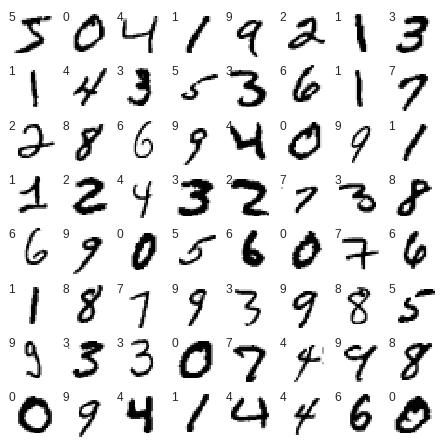

In [4]:
# set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

In [5]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

print('X_train:\t{}' .format(X_train.shape),' -reshaped')
print('X_test: \t{}' .format(X_test.shape),' -reshaped')

X_train:	(60000, 28, 28, 1)  -reshaped
X_test: 	(10000, 28, 28, 1)  -reshaped


### 1.4 One Hot Encoding

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

This means that categorical data must be converted to a numerical form.

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# 2. Implementing a Neural Network

### 2.1 Hyperparameters

In [0]:
# Hyperparameters
training_epochs = 10 # Total number of training epochs
learning_rate = 0.03 # The learning rate

### 2.2 Creating a model

To make this work in keras we need to compile a model. An important choice to make is the loss function. We use the **categorical_crossentropy** loss because it measures the probability error in discrete classification tasks in which the classes are mutually exclusive (each entry is in exactly one class).

In [8]:
# create a model
def create_model():
  model = Sequential()
  
  model.add(Conv2D(filters = 16, kernel_size = (3,3), activation='relu',input_shape = (28,28,1)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters = 16, kernel_size = (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(strides=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(strides=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  # Compile a model
  model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.adadelta(), metrics=['accuracy'])
  return model

model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        4640      
__________

### 2.3 Train the model

Let's trains the model for a given number of epochs.

In [9]:
results = model.fit(
 X_train, y_train,
 epochs= training_epochs,
 batch_size = 128,
 validation_data = (X_test, y_test),
 verbose = 2
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 0.2303 - acc: 0.9296 - val_loss: 0.0369 - val_acc: 0.9874
Epoch 2/10
 - 8s - loss: 0.0736 - acc: 0.9778 - val_loss: 0.0305 - val_acc: 0.9914
Epoch 3/10
 - 8s - loss: 0.0550 - acc: 0.9834 - val_loss: 0.0316 - val_acc: 0.9903
Epoch 4/10
 - 8s - loss: 0.0440 - acc: 0.9871 - val_loss: 0.0312 - val_acc: 0.9909
Epoch 5/10
 - 8s - loss: 0.0389 - acc: 0.9886 - val_loss: 0.0260 - val_acc: 0.9923
Epoch 6/10
 - 8s - loss: 0.0340 - acc: 0.9899 - val_loss: 0.0230 - val_acc: 0.9932
Epoch 7/10
 - 8s - loss: 0.0310 - acc: 0.9909 - val_loss: 0.0210 - val_acc: 0.9941
Epoch 8/10
 - 8s - loss: 0.0281 - acc: 0.9918 - val_loss: 0.0230 - val_acc: 0.9936
Epoch 9/10
 - 8s - loss: 0.0259 - acc: 0.9925 - val_loss: 0.0255 - val_acc: 0.9928
Epoch 10/10
 - 8s - loss: 0.0245 - acc: 0.9923 - val_loss: 0.0210 - val_acc: 0.9944


### 2.4 Test the model

Model can generate output predictions for the input samples.

In [0]:
prediction_values = model.predict_classes(X_test)

### 2.5 Accuracy

Test-Accuracy :

In [11]:
print("Test-Accuracy:","%.2f%%" % (np.mean(results.history["val_acc"])*100))

Test-Accuracy: 99.20%


### 2.6 Evaluate the model to see the accuracy

Now we can check the accuracy of our model

In [12]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train,y_train)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
60000/60000 [==============================] - 6s 92us/step
loss=0.0079, accuracy: 99.7700%
Evaluating on testing set...
10000/10000 [==============================] - 1s 102us/step
loss=0.0210, accuracy: 99.4400%


### 2.7 Summarize history for accuracy and loss


Maximum Loss : 0.2303
Minimum Loss : 0.0245
Loss difference : 0.2058


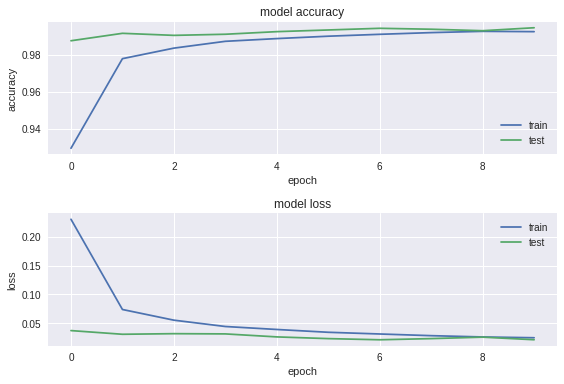

In [13]:
# summarize history for accuracy
plt.subplot(211)
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

# summarize history for loss
plt.subplot(212)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("Minimum Loss : {:.4f}".format(min_loss))
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

### 2.8 Save a model to JSON and HDF5

In [0]:
model_json = model.to_json()
with open("CNN_model_Keras_digits_recoginition.json", "w") as json_file:
    json_file.write(model_json)
# save weights to HDF5
model.save_weights("CNN_model_Keras_digits_recoginition.h5")

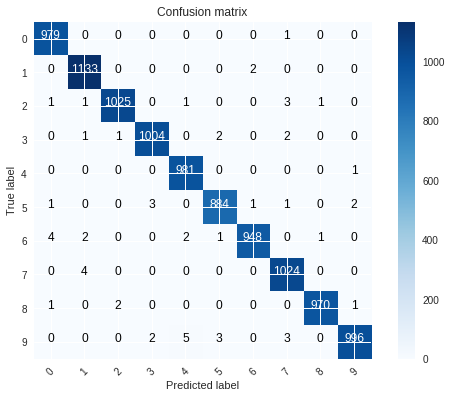

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

# 3. Visualization

### 3.3 Display the test set and predictions

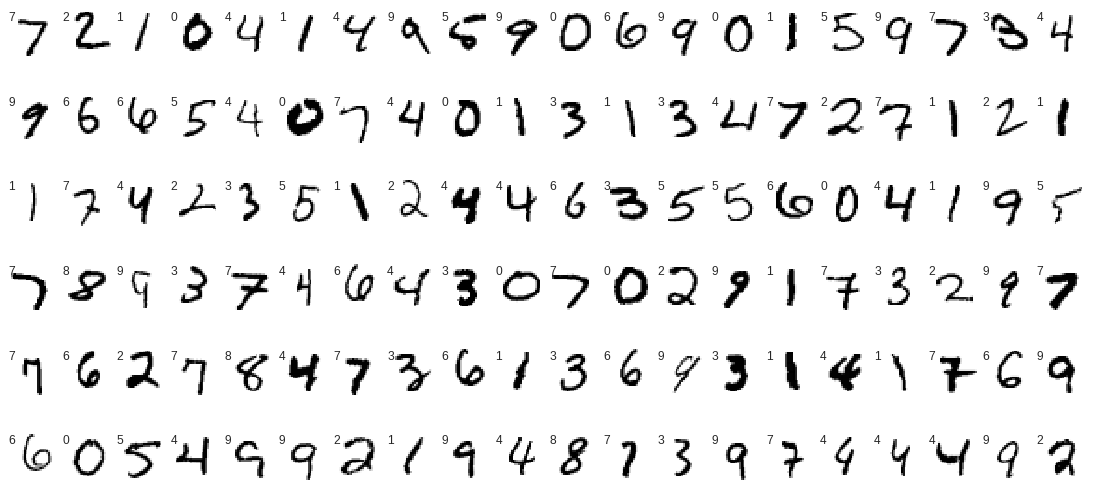

In [16]:
# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(120):
    ax = fig.add_subplot(6, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((28,28)),cmap=plt.cm.gray_r, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(prediction_values[i]))

# 4. Test out model

### 4.1 Import files

In google colab we can import files through the following commands:

In [0]:
#from google.colab import files
#files.upload()

### 4.2 Reshape pictures

Test out model on imported picture:

In order to transfer the image to the grayscale, we will do the following:

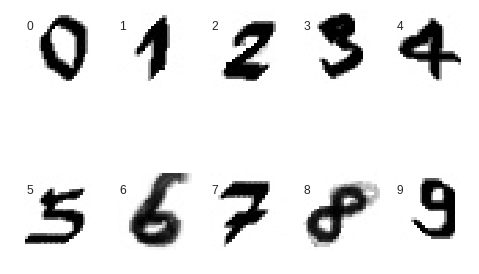

In [18]:
import cv2

for i in range(10):
  file = 'number_'+str(i)+'.jpg'
  image = cv2.imread(file)
  grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image_n = cv2.bitwise_not(grayImage)
  image_n = image_n[:,:].reshape(1,28,28,1)
  image_n = image_n.astype('float32')
  image_n /= 255.
  predict = model.predict_classes(image_n)
  plt.subplot(2,5,i+1)
  plt.imshow(image_n.reshape(28,28))
  plt.text(0, 7, predict[0])
  plt.grid('off')
  plt.axis('off')

# 5. Save a model as picture

### 5.1 Save a model as png picture

In [0]:
plot_model(model,show_shapes=True,show_layer_names=False, to_file='model.png')



---



---


For more informations, visit http://datahacker.rs/ .

For more examples, visit https://github.com/DavorJordacevic.


---



---
